<a href="https://www.kaggle.com/code/alihassanshahid/car-price-prediction?scriptVersionId=197624606" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Car Prediction System**

### Machine Learning Models used

* RandomForest    
* AdaBoost     
* GradientBoosting     
* KNeighbors     
* SVR    
* DecisionTree     
* XGBoost     
* CatBoost     
* LGBM 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/kaggle/input/car-price-prediction-challenge/car_price_prediction.csv")


In [3]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
df.shape

(19237, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

# **Visualization 1: Distribution of Car Prices**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


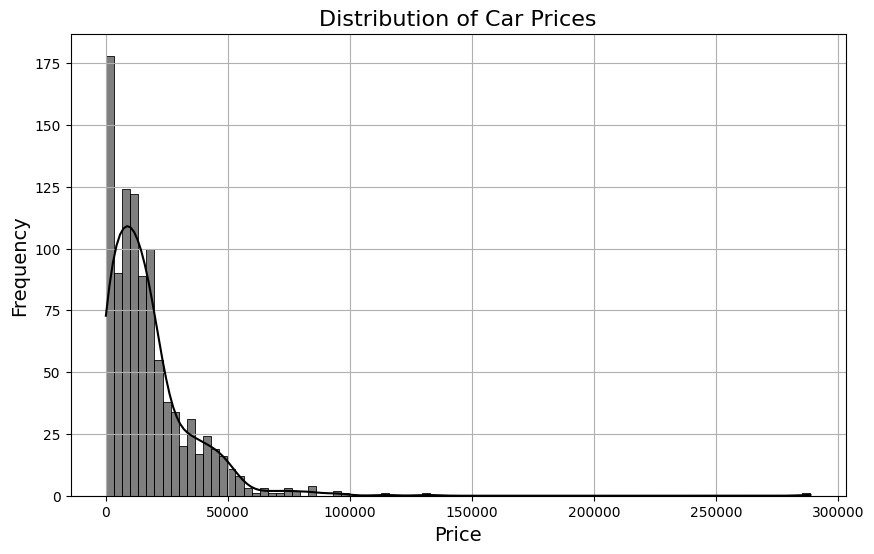

In [6]:
df_sampled = df.sample(n=1000, random_state=42)

sns.set_palette(["#f7e227", "#000000", "#ff4d4d"])

plt.figure(figsize=(10, 6))
sns.histplot(df_sampled['Price'], kde=True, color='black')
plt.title('Distribution of Car Prices', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()


# Visualization 2: Price vs. Mileage

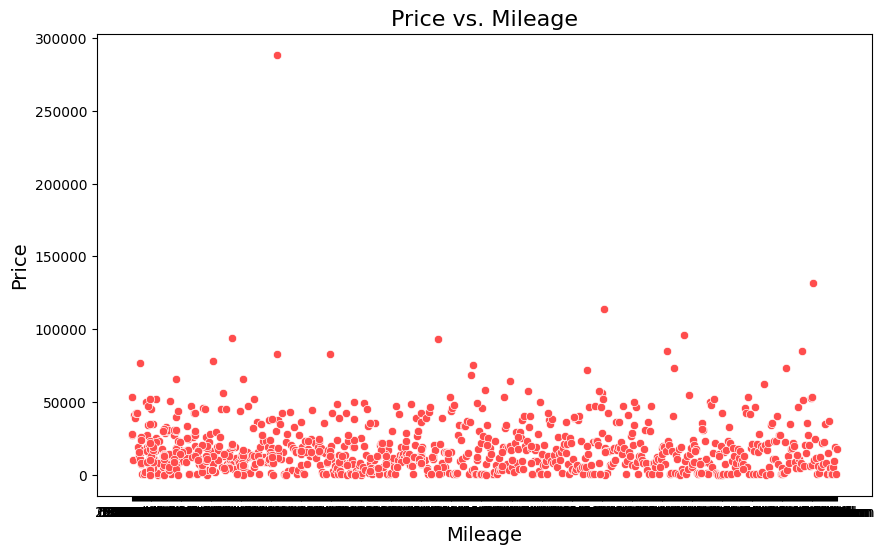

In [7]:
df_sampled = df.sample(n=1000, random_state=42)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mileage', y='Price', data=df_sampled, color='#ff4d4d')
plt.title('Price vs. Mileage', fontsize=16)
plt.xlabel('Mileage', fontsize=14)
plt.ylabel('Price', fontsize=14)
# plt.grid(True)
plt.show()


# Visualization 3: Price vs. Production Year

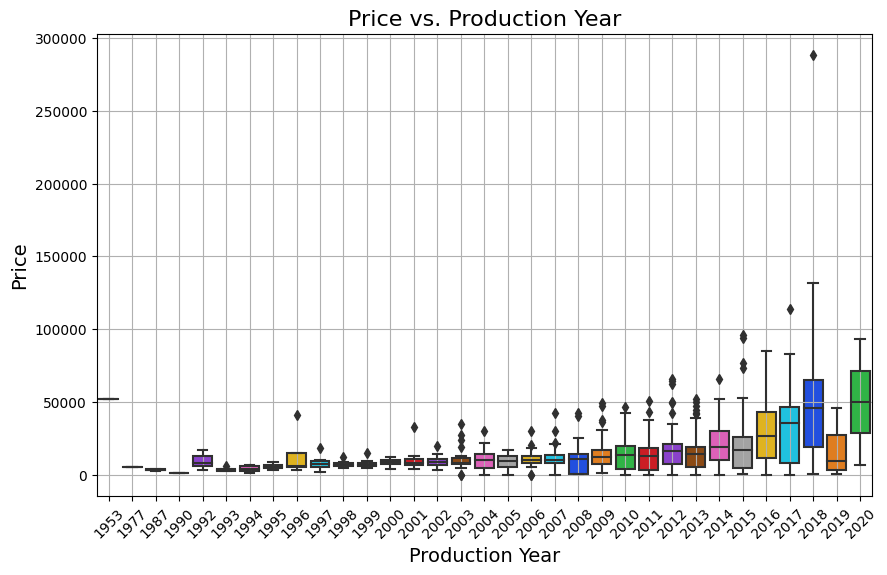

In [8]:
df_sampled = df.sample(n=1000, random_state=42)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Prod. year', y='Price', data=df_sampled, palette='bright')
plt.title('Price vs. Production Year', fontsize=16)
plt.xlabel('Production Year', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Data Cleaning

In [9]:
# df = df.drop(['ID','Levy','Doors', 'Drive wheels', 'Leather interior', 'Wheel', 'Color'], axis=True)

# df['Mileage'] = df['Mileage'].str.rstrip(' km')

df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [10]:
import pandas as pd

# Convert 'Mileage' column from string to numeric after removing ' km'
df['Mileage'] = pd.to_numeric(df['Mileage'].str.replace(' km', ''))

# Convert 'Engine volume' to numeric, accounting for potential non-numeric values
df['Engine volume'] = pd.to_numeric(df['Engine volume'], errors='coerce')

# Ensure 'Price' is numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter the dataframe by removing rows with values outside the IQR range
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# List of numeric columns to apply outlier removal
numeric_columns = ['Price', 'Mileage', 'Engine volume']

# Apply outlier removal to each numeric column
for column in numeric_columns:
    df = remove_outliers(df, column)

# Display the cleaned dataset without outliers
print(df.describe())


                 ID         Price    Prod. year  Engine volume        Mileage  \
count  1.497600e+04  14976.000000  14976.000000   14976.000000   14976.000000   
mean   4.559958e+07  13657.441506   2010.924613       2.158794  130187.483240   
std    8.486692e+05  11215.622371      5.519187       0.629238   79745.416991   
min    2.074688e+07      1.000000   1939.000000       0.500000       0.000000   
25%    4.570949e+07   4391.000000   2010.000000       1.600000   71241.500000   
50%    4.577355e+07  11917.000000   2012.000000       2.000000  124184.000000   
75%    4.580223e+07  19707.000000   2014.000000       2.500000  179746.000000   
max    4.581665e+07  47120.000000   2020.000000       3.700000  364523.000000   

          Cylinders       Airbags  
count  14976.000000  14976.000000  
mean       4.380409      6.570045  
std        0.869664      4.276882  
min        1.000000      0.000000  
25%        4.000000      4.000000  
50%        4.000000      5.000000  
75%        4.00000

In [11]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

# Models 

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
import seaborn as sns
import matplotlib.pyplot as plt

# Identifying categorical and numerical columns
categorical_columns = df.select_dtypes('object').columns
numerical_columns = df.select_dtypes(exclude='object').drop('Price', axis=1).columns

# Define preprocessing for numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_columns)
    ]
)

# Define different models
models = {
    # 'LinearRegression': LinearRegression(),
    # 'Ridge': Ridge(alpha=1.0),
    # 'Lasso': Lasso(alpha=0.1),
    'RandomForest': RandomForestRegressor(n_estimators=500, random_state=50),
    # 'AdaBoost': AdaBoostRegressor(n_estimators=500, random_state=50),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, random_state=50),
    'KNeighbors': KNeighborsRegressor(n_neighbors=5),
    'SVR': SVR(kernel='rbf', C=1000, gamma=0.1, epsilon=.1),
    'DecisionTree': DecisionTreeRegressor(random_state=50),
    'XGBoost': XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=6, random_state=50),
    'CatBoost': CatBoostRegressor(iterations=1000, learning_rate=0.05, depth=6, loss_function='RMSE', random_seed=50, verbose=False),
    'LGBM': LGBMRegressor(n_estimators=1000, learning_rate=0.05, random_state=50)
}

# Splitting the data into training and testing sets
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train and evaluate each model
for name, model in models.items():
    # Define the pipeline for each model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = pipeline.predict(X_test)
    
    # Evaluation metrics
    # print(f"\nModel: {name}")
    # print('R2 score:', r2_score(y_test, y_pred))
    # print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
    # print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

    # Plotting actual vs predicted prices for each model
    # plt.figure(figsize=(10, 6))
    # sns.scatterplot(x=y_test, y=y_pred, color='#f7e227')
    # plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    # plt.title(f'Predicted vs. Actual Prices for {name}', fontsize=16)
    # plt.xlabel('Actual Price', fontsize=14)
    # plt.ylabel('Predicted Price', fontsize=14)
    # plt.grid(True)
    # plt.show()



/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarn

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015911 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1101
[LightGBM] [Info] Number of data points in the train set: 11980, number of used features: 251
[LightGBM] [Info] Start training from score 13670.071369


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016607 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1101
[LightGBM] [Info] Number of data points in the train set: 11980, number of used features: 251
[LightGBM] [Info] Start training from score 13670.071369

Model Performance Comparison:
              Model  R2 Score  Mean Absolute Error  Mean Squared Error  \
0      RandomForest  0.813712          2833.130189        2.274047e+07   
1  GradientBoosting  0.679983          4555.479977        3.906504e+07   
2        KNeighbors  0.684324          3901.506676        3.853510e+07   
3               SVR  0.635852          4310.625939        4.445219e+07   
4      DecisionTree  0.641111          3555.200267        4.381019e+07   
5           XGBoost  0.777341          3552.527199        2.718037e+07   
6          CatBoost  0.766555          3747.701542        2.849708e+07   
7              LGBM  0.814520 

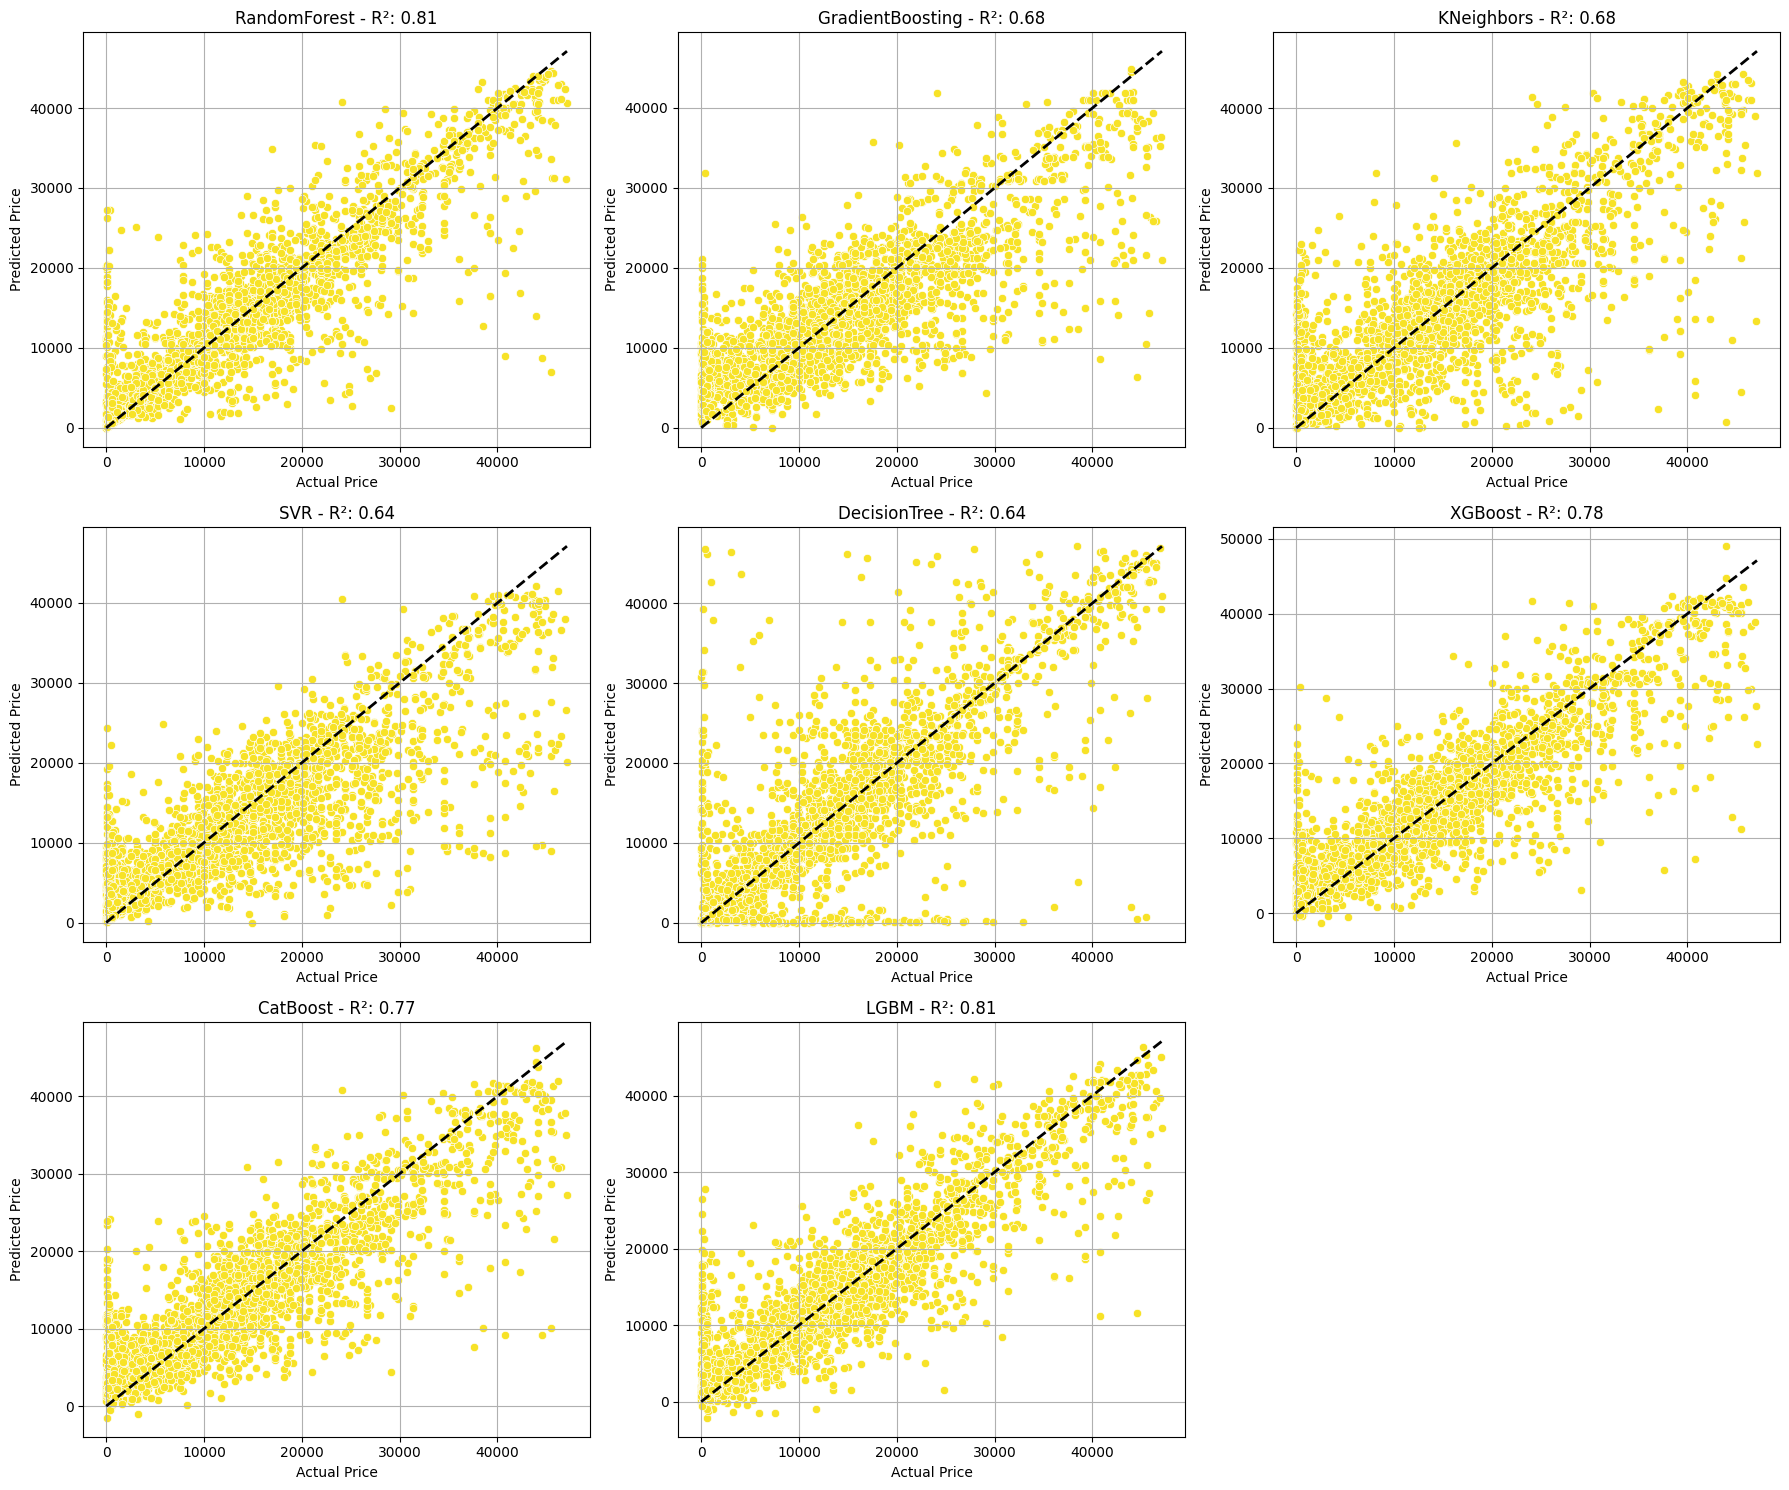

In [13]:
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

# Store model results
model_performance = []

# Train and evaluate each model
for name, model in models.items():
    # Define the pipeline for each model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = pipeline.predict(X_test)
    
    # Evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    # Save results
    model_performance.append({
        'Model': name,
        'R2 Score': r2,
        'Mean Absolute Error': mae,
        'Mean Squared Error': mse,
        'Predictions': y_pred  # Save predictions for later visualization
    })

# Convert results to DataFrame for easy comparison
performance_df = pd.DataFrame(model_performance)

# Display performance of all models
print("\nModel Performance Comparison:")
print(performance_df)

# Create a combined plot of actual vs predicted prices for all models
num_models = len(model_performance)
ncols = 3  # Number of columns in the subplot
nrows = (num_models + ncols - 1) // ncols  # Calculate number of rows needed

plt.figure(figsize=(18, nrows * 5))  # Adjust figure size for better readability

for idx, model_info in enumerate(model_performance):
    plt.subplot(nrows, ncols, idx + 1)
    sns.scatterplot(x=y_test, y=model_info['Predictions'], color='#f7e227')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.title(f"{model_info['Model']} - R²: {model_info['R2 Score']:.2f}", fontsize=12)
    plt.xlabel('Actual Price', fontsize=10)
    plt.ylabel('Predicted Price', fontsize=10)
    plt.grid(True)

plt.tight_layout()
plt.show()
